### Université de Sherbrooke

### Cours : IFT870 - Forage de données

### Travaux pratiques : TP1

### Auteurs :
- Meuleghe Kenmegne, Laetitia
- Daouda, Abdou Rahime
- Couthon, Mahutondji Josué Friedman (coum3028)


#### Date : 05 mars 2024


## Introduction

Dans le cadre du cours IFT870 - Forage de données, nous avons été chargés de réaliser un travail pratique axé sur l'exploration de données. Ce TP va nous permettre d'appliquer et de renforcer nos compétences en matière de visualisation de données, d'analyse de corrélation entre attributs, de réduction de dimension et de choix d'une mesure de similarité entre objets.

Nous travaillons sur un ensemble de données tiré de l'étude de Lévêque, Tahiri et al. (2021) intitulée « Quantitative Structure-Activity Relationship (QSAR) modeling to predict the transfer of environmental chemicals across the placenta ». Cet ensemble de données modifié comprend 154 observations représentées par 76 variables et segmentées en 5 classes.

L'objectif est de déterminer si les 75 variables utilisées pour la représentation ont des propriétés discriminantes pour la classification de nouvelles observations par l'utilisation d'un modèle de classification basé sur la distance, comme la méthode des k = 5 plus proches voisins ou la méthode du plus proche centroïde.

Ce rapport présente notre approche pour explorer et analyser ces données, ainsi que les résultats que nous avons obtenus.


### Installation des bibliothèques utiles

In [1]:
"""
# Décommenter cette cellule pour installer les bibiliothèque utiles 
# Installation les bibliothèques utiles
%pip install pandas plotly seaborn matplotlib
%pip install openpyxl 
%pip install --upgrade nbformat
%pip install scikit-learn
%pip install Pyarrow
"""


'\n# Décommenter cette cellule pour installer les bibiliothèque utiles \n# Installation les bibliothèques utiles\n%pip install pandas plotly seaborn matplotlib\n%pip install openpyxl \n%pip install --upgrade nbformat\n%pip install scikit-learn\n%pip install Pyarrow\n'

### Importation des bibiothèques et des données

In [2]:
# Importation des bibliothèques nécessaires
import warnings
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


warnings.filterwarnings('ignore', category=DeprecationWarning)

# Chargement des données
data = pd.read_excel('QSAR_dataset.xlsx')


num_observations = data.shape[0]
num_variables = data.shape[1]
num_classes = data['Class'].nunique()

# Affichage du nombre d'observations, de variable et de classes
print(f"Nombre d'observations : {num_observations}")
print(f"Nombre de variables : {num_variables}")
print(f"Nombre de classes : {num_classes}")

# Affichage des premières lignes du DataFrame
data


Nombre d'observations : 154
Nombre de variables : 76
Nombre de classes : 5


,SMILES,Class,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,Class 2,41.283001,21.282999,622.40619,43,0,43.0,40,49.644451,...,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246
1,c12c(cccc1)cccc2,Class 2,22.934343,155.975430,156.69504,18,0,10.0,10,17.839369,...,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50
2,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,Class -2,42.919998,38.976181,499.52170,22,0,22.0,22,21.868664,...,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118
3,ClC1(Cl)C2(Cl)C(Cl)=C(Cl)C1(Cl)C1C2C(Cl)C2(Cl)...,Class -2,38.509171,46.270092,421.43369,23,1,19.0,16,38.822643,...,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130
4,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,Class -2,41.406792,56.392834,480.49115,22,0,21.0,21,26.558620,...,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Clc1c(Cl)cc(-c2c(Cl)cc(Cl)cc2)cc1Cl,Class -1,35.353966,108.591640,369.80264,22,0,17.0,17,31.868664,...,274.55731,0.000000,253.96802,0.000000,0.189245,0.410473,-5.342964,NaN,326.43698,88
150,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.002380,74.775352,427.29446,22,0,19.0,17,34.823284,...,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
151,c12c3c(ccc1cccc2)cccc3,Class 0,31.307930,174.869430,178.80505,24,0,14.0,14,23.516850,...,198.75549,0.000000,166.91910,0.000000,0.098131,0.212847,NaN,-0.108926,178.23399,76
152,Clc1c(Cl)cc2c(oc3c2cc(Cl)c(Cl)c3)c1,Class 0,33.309174,104.919330,333.65930,21,0,17.0,14,33.219116,...,248.35408,0.000000,204.05783,0.000000,0.211047,0.457762,NaN,-0.234263,305.97501,96


## Question 1
### (a) : Analyse des données
Dans cette section, nous allons analyser l'ensemble de nos données afin de mieux comprendre la distribution et les caractéristiques de chaque attribut. Nous allons donc réaliser ce qui suit : 

- **Analyser chaque attribut.**
- **Proposer un prétraitement de vos données.**
- **Sélectionner les 10 meilleurs attributs.**
- **Visualiser la distribution des 10 meilleurs attributs.**


#### Analyse de chaque attribut et prétraitement des données


**Analyse des types de variables** : Nous allons comprendre d'abords le type de chaque variable dans notre jeu de données. En particulier, nous voulons savoir combien de variables sont catégoriques et combien de variables sont numériques.

In [3]:
# Variables numériques
numerical_vars = data.select_dtypes(include=['int64', 'float64'])
# Variables catégoriques (y compris la classe)
categorical_vars = data.select_dtypes(include=['object'])


# Pourcentages pour chaque type de données
pct_categorical = 100 * len(categorical_vars.columns) / num_variables
pct_numerical = 100 * len(numerical_vars.columns) / num_variables


print(f"Nombre de variables numériques : {len(numerical_vars.columns)} ({pct_numerical:.2f}%)")
print(f"Nombre de variables catégoriques : {len(categorical_vars.columns)} ({pct_categorical:.2f}%)")


Nombre de variables numériques : 74 (97.37%)
Nombre de variables catégoriques : 2 (2.63%)


**Analyse descriptive** : Cette analyse va nous permettre d'obtenir des informations de base sur chaque *attribut numérique*, comme le nombre de valeurs, la moyenne, l'écart-type, les valeurs minimales et maximales, etc.


In [4]:
# Analyse descriptive

numerical_vars.describe()


,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
count,154.000000,152.000000,153.000000,154.000000,154.000000,153.000000,154.000000,153.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,1.470000e+02,141.000000,136.000000,154.000000,154.000000
mean,34.610698,105.781739,359.928668,23.909091,0.292208,18.875817,17.350649,33.912102,11.649351,3.110390,...,273.307303,8.076532,239.944812,9.086768,2.379611,-6.802721e+08,-66.497364,-2.501405,359.813016,101.350649
std,5.951534,62.391286,111.225998,4.895461,0.862625,5.596428,5.028718,9.714722,2.472152,2.954031,...,52.783753,14.721655,59.915749,15.129738,2.637952,8.247861e+09,73.647379,2.807324,132.955027,33.487395
min,17.148172,8.778115,122.917570,12.000000,0.000000,10.000000,6.000000,12.000000,6.000000,0.000000,...,140.102050,0.000000,67.651054,0.000000,0.011998,-1.000000e+11,-209.769584,-8.247237,128.174000,46.000000
25%,31.534723,70.909811,330.864750,22.000000,0.000000,17.000000,16.000000,30.541887,12.000000,0.000000,...,246.182178,0.000000,203.302167,0.000000,0.124434,2.696068e-01,-132.566487,-5.058933,291.992000,88.000000
50%,35.579689,98.659012,389.503510,22.000000,0.000000,18.000000,17.000000,31.868664,12.000000,4.000000,...,281.160615,0.000000,253.968020,0.000000,0.376156,8.136986e-01,-10.648449,-0.411358,360.881990,94.000000
75%,38.401845,139.629990,427.294460,25.750000,0.000000,19.000000,18.000000,37.087944,12.000000,6.000000,...,295.503230,13.566921,272.261230,13.566921,4.786711,9.972196e+00,-3.509363,-0.133136,410.317990,106.000000
max,52.422001,356.764860,622.904600,43.000000,4.000000,43.000000,40.000000,86.319427,20.000000,10.000000,...,432.120120,59.150364,475.687620,59.150364,7.429943,1.611555e+01,-0.338738,-0.013318,959.170960,246.000000


**Prétraitement des variables catégoriques** :

Comme les auteurs de l'article de référence, nous allons supprimer la variable ``SMILES`` de notre jeu de données. Cette variable représente des structures chimiques sous forme de chaînes de caractères, ce qui ne semble pas approprié pour notre analyse.

Pour la variable ``Class``, même s'elle semble être une variable catégorique ordinale (car les classes semblent avoir un ordre de -2 à 2), nous allons la laisser comme tel, c'est à dire en chaine de caractère.


In [5]:
# Suppression de la variable 'SMILES'
data = data.drop(columns='SMILES')
categorical_vars = categorical_vars.drop(columns='SMILES')
data

,Class,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,Class 2,41.283001,21.282999,622.40619,43,0,43.0,40,49.644451,14,...,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246
1,Class 2,22.934343,155.975430,156.69504,18,0,10.0,10,17.839369,10,...,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50
2,Class -2,42.919998,38.976181,499.52170,22,0,22.0,22,21.868664,12,...,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118
3,Class -2,38.509171,46.270092,421.43369,23,1,19.0,16,38.822643,10,...,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130
4,Class -2,41.406792,56.392834,480.49115,22,0,21.0,21,26.558620,12,...,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Class -1,35.353966,108.591640,369.80264,22,0,17.0,17,31.868664,12,...,274.55731,0.000000,253.96802,0.000000,0.189245,0.410473,-5.342964,NaN,326.43698,88
150,Class 0,37.002380,74.775352,427.29446,22,0,19.0,17,34.823284,12,...,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
151,Class 0,31.307930,174.869430,178.80505,24,0,14.0,14,23.516850,14,...,198.75549,0.000000,166.91910,0.000000,0.098131,0.212847,NaN,-0.108926,178.23399,76
152,Class 0,33.309174,104.919330,333.65930,21,0,17.0,14,33.219116,12,...,248.35408,0.000000,204.05783,0.000000,0.211047,0.457762,NaN,-0.234263,305.97501,96


**Analyse des observations répétées** : Nous allons vérifier s'il y a des observations répétées/dupliquées dans notre jeu de données. Une observation répétée est une ligne de données qui apparaît plus d'une fois dans le jeu de données.

In [6]:
duplicates = data.duplicated()

print(f"Nombre d'observations en double : {duplicates.sum()}")

Nombre d'observations en double : 22


In [7]:
# Suppression des observations en double
data = data.drop_duplicates()

print(f"Nombre d'observations après suppression des doublons : {data.shape[0]}")

Nombre d'observations après suppression des doublons : 132


**Visualisation de la variable des classes** : Pour mieux comprendre la distribution des classes dans notre jeu de données, nous allons visualiser la variable ``Class`` en utilisant un diagramme à barres. Cela nous permettra de voir combien d'observations nous avons pour chaque classe.

In [8]:
class_percentage = 100 * data['Class'].value_counts() / len(data)

fig = px.bar(x=class_percentage.index, y=class_percentage.values,
             labels={'x': 'Classe', 'y': 'Pourcentage (%)'},
             title='Distribution des classes dans le jeu de données')

fig.show()


**Valeurs manquantes** :  Cette analyse va nous aider à identifier les attributs qui ont des valeurs manquantes et à décider comment gérer celles-ci.

In [9]:
# Calcul du nombre et du pourcentage de valeurs manquantes pour chaque attribut
missing_values = data.isnull().sum()
missing_percentage = 100 * data.isnull().sum() / len(data)

# DataFrame pour afficher les résultats
missing_values_df = pd.DataFrame({'num_missing': missing_values,
                                  'pct_missing (%)': missing_percentage})

missing_values_df = missing_values_df.sort_values(by='num_missing', ascending=False)

# Calcul du nombre d'attributs avec des valeurs manquantes
num_attr_with_missing = missing_values_df[missing_values_df['num_missing'] > 0].shape[0]

print(f"Nombre d'attributs avec des valeurs manquantes : {num_attr_with_missing} sur {num_variables - 1}")

# Affichage du DataFrame
missing_values_df.head(10)


Nombre d'attributs avec des valeurs manquantes : 7 sur 75


,num_missing,pct_missing (%)
vsurf_V,16,12.121212
vsurf_S,12,9.090909
vsurf_R,7,5.303030
ASA+,2,1.515152
ASA-,1,0.757576
a_heavy,1,0.757576
a_IC,1,0.757576
Class,0,0.000000
radius,0,0.000000
std_dim1,0,0.000000


**Prétraitement pour les valeurs manquantes** : 

Nous allons utiliser l’algorithme K-Nearest Neighbors (KNN) pour remplacer les valeurs manquantes dans nos données. Dans notre cas, nous allons utiliser KNN avec n_neighbors=1, ce qui signifie que chaque valeur manquante sera remplacée par la valeur de l’observation la plus proche.


In [10]:
numerical_vars

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,41.283001,21.282999,622.40619,43,0,43.0,40,49.644451,14,0,...,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246
1,22.934343,155.975430,156.69504,18,0,10.0,10,17.839369,10,0,...,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50
2,42.919998,38.976181,499.52170,22,0,22.0,22,21.868664,12,10,...,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118
3,38.509171,46.270092,421.43369,23,1,19.0,16,38.822643,10,8,...,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130
4,41.406792,56.392834,480.49115,22,0,21.0,21,26.558620,12,9,...,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,35.353966,108.591640,369.80264,22,0,17.0,17,31.868664,12,5,...,274.55731,0.000000,253.96802,0.000000,0.189245,0.410473,-5.342964,NaN,326.43698,88
150,37.002380,74.775352,427.29446,22,0,19.0,17,34.823284,12,6,...,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
151,31.307930,174.869430,178.80505,24,0,14.0,14,23.516850,14,0,...,198.75549,0.000000,166.91910,0.000000,0.098131,0.212847,NaN,-0.108926,178.23399,76
152,33.309174,104.919330,333.65930,21,0,17.0,14,33.219116,12,4,...,248.35408,0.000000,204.05783,0.000000,0.211047,0.457762,NaN,-0.234263,305.97501,96


In [11]:
from sklearn.impute import KNNImputer

data_X = numerical_vars
data_Y = categorical_vars

imputer = KNNImputer(n_neighbors=1)
data_X = imputer.fit_transform(data_X)
data_X = pd.DataFrame(data_X, columns=numerical_vars.columns)

print(f"Nombre de valeurs manquantes après imputation: {data_X.isnull().sum().sum()}")

data_X 

Nombre de valeurs manquantes après imputation: 0


,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,41.283001,21.282999,622.40619,43.0,0.0,43.0,40.0,49.644451,14.0,0.0,...,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246.0
1,22.934343,155.975430,156.69504,18.0,0.0,10.0,10.0,17.839369,10.0,0.0,...,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50.0
2,42.919998,38.976181,499.52170,22.0,0.0,22.0,22.0,21.868664,12.0,10.0,...,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118.0
3,38.509171,46.270092,421.43369,23.0,1.0,19.0,16.0,38.822643,10.0,8.0,...,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130.0
4,41.406792,56.392834,480.49115,22.0,0.0,21.0,21.0,26.558620,12.0,9.0,...,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,35.353966,108.591640,369.80264,22.0,0.0,17.0,17.0,31.868664,12.0,5.0,...,274.55731,0.000000,253.96802,0.000000,0.189245,0.410473,-5.342964,-0.210062,326.43698,88.0
150,37.002380,74.775352,427.29446,22.0,0.0,19.0,17.0,34.823284,12.0,6.0,...,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100.0
151,31.307930,174.869430,178.80505,24.0,0.0,14.0,14.0,23.516850,14.0,0.0,...,198.75549,0.000000,166.91910,0.000000,0.098131,0.212847,-2.770541,-0.108926,178.23399,76.0
152,33.309174,104.919330,333.65930,21.0,0.0,17.0,14.0,33.219116,12.0,4.0,...,248.35408,0.000000,204.05783,0.000000,0.211047,0.457762,-5.958502,-0.234263,305.97501,96.0


**Analyse des valeurs extrêmes (outliers)** : Cette analyse peut aider à identifier les attributs qui ont des valeurs extrêmes qui pourraient affecter l’analyse.

In [12]:

# Calcul des quartiles
Q1 = data[numerical_vars.columns].quantile(0.25)
Q3 = data[numerical_vars.columns].quantile(0.75)

# Intervalle interquartile
IQR = Q3 - Q1

# Identification des outliers
outliers = ((data[numerical_vars.columns] < (Q1 - 1.5 * IQR)) | (data[numerical_vars.columns] > (Q3 + 1.5 * IQR))).sum()

outliers_df = pd.DataFrame(outliers, columns=['Num_Outliers'])

outliers_df.sort_values(by='Num_Outliers', ascending=False)


,Num_Outliers
a_nC,53
chi0_C,43
chi0v_C,43
chi1v_C,37
a_count,32
...,...
a_nCl,0
std_dim3,0
rsynth,0
DASA,0


**Prétraitement des données : Normalisation**

La normalisation permet de mettre à l’échelle les valeurs numériques des différentes variables afin qu’elles se situent dans une plage commune. Nous l'effection ici en soustrayant la moyenne et en divisant par l’écart-type, ce qui donne une distribution avec une moyenne de 0 et un écart-type de 1.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_X_normalized = scaler.fit_transform(data_X)
data_X = pd.DataFrame(data_X_normalized, columns=data_X.columns)

data_X

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,1.124764,-1.364503,2.368536,3.912440,-0.339848,4.339582,4.518696,1.629393,0.953954,-1.056366,...,2.815924,1.298732,1.966350,1.196713,0.468113,0.080845,-0.468113,-0.482788,2.665846,4.333609
1,-1.968308,0.802662,-1.840948,-1.210993,-0.339848,-1.595228,-1.466503,-1.665886,-0.669349,-1.056366,...,-2.317570,-0.550406,-1.826158,-0.602549,-0.889752,0.080845,0.889752,0.878772,-1.747920,-1.538435
2,1.400716,-1.079825,1.257804,-0.391244,-0.339848,0.562884,0.927576,-1.248417,0.142302,2.339884,...,1.237706,-0.550406,1.766370,-0.602549,-0.886690,0.080845,0.886690,0.875702,1.047738,0.498805
3,0.657174,-0.962468,0.551979,-0.186307,0.823187,0.023356,-0.269464,0.508161,-0.669349,1.660634,...,0.393087,-0.379778,0.387563,-0.436524,0.986507,0.080845,-0.986507,-1.002593,0.482574,0.858318
4,1.145632,-0.799595,1.085790,-0.391244,-0.339848,0.383042,0.728070,-0.762497,0.142302,2.000259,...,1.084305,-0.550406,1.460058,-0.602549,-0.852631,0.080845,0.852631,0.841550,0.787820,0.319048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.125294,0.040269,0.085295,-0.391244,-0.339848,-0.336329,-0.069957,-0.212331,0.142302,0.641759,...,0.023759,-0.550406,0.234812,-0.602549,-0.833037,0.080845,0.833037,0.821902,-0.251852,-0.399978
150,0.403171,-0.503826,0.604954,-0.391244,-0.339848,0.023356,-0.069957,0.093793,0.142302,0.981384,...,0.358163,0.374163,0.276418,0.297082,1.728696,0.080845,-1.728696,-1.746801,0.121187,-0.040465
151,-0.556755,1.106661,-1.641100,0.018631,-0.339848,-0.875857,-0.668477,-1.077650,0.953954,-1.056366,...,-1.417009,-0.550406,-1.222783,-0.602549,-0.867689,0.080845,0.867689,0.856649,-1.370173,-0.759491
152,-0.219401,-0.018817,-0.241398,-0.596181,-0.339848,-0.336329,-0.668477,-0.072412,0.142302,0.302134,...,-0.474287,-0.550406,-0.600912,-0.602549,-0.824745,0.080845,0.824745,0.813588,-0.406255,-0.160302


#### Sélection les 10 meilleurs attributs

**Analyse de la variance** : Cette analyse peut aider à identifier les attributs qui ont une faible variance et qui pourraient ne pas contribuer beaucoup à l’analyse. Mais étant donné qu'on a normalisé nos données, la variance devrait être de 1 pour tous les attributs.

In [14]:
# Analyse de la variance

variance_df = pd.DataFrame(data_X.var(), columns=['Variance'])

variance_df.sort_values(by='Variance', ascending=True).head(10)


,Variance
zagreb,1.006536
density,1.006536
pmi,1.006536
radius,1.006536
rsynth,1.006536
a_IC,1.006536
chi0v_C,1.006536
ASA-,1.006536
vsurf_V,1.006536
vsurf_A,1.006536


**Matrice de corrélation** : La matrice de corrélation est une bonne option pour visualiser les relations entre un grand nombre d'attributs. Elle nous permet de voir rapidement quels attributs sont fortement corrélés entre eux. 

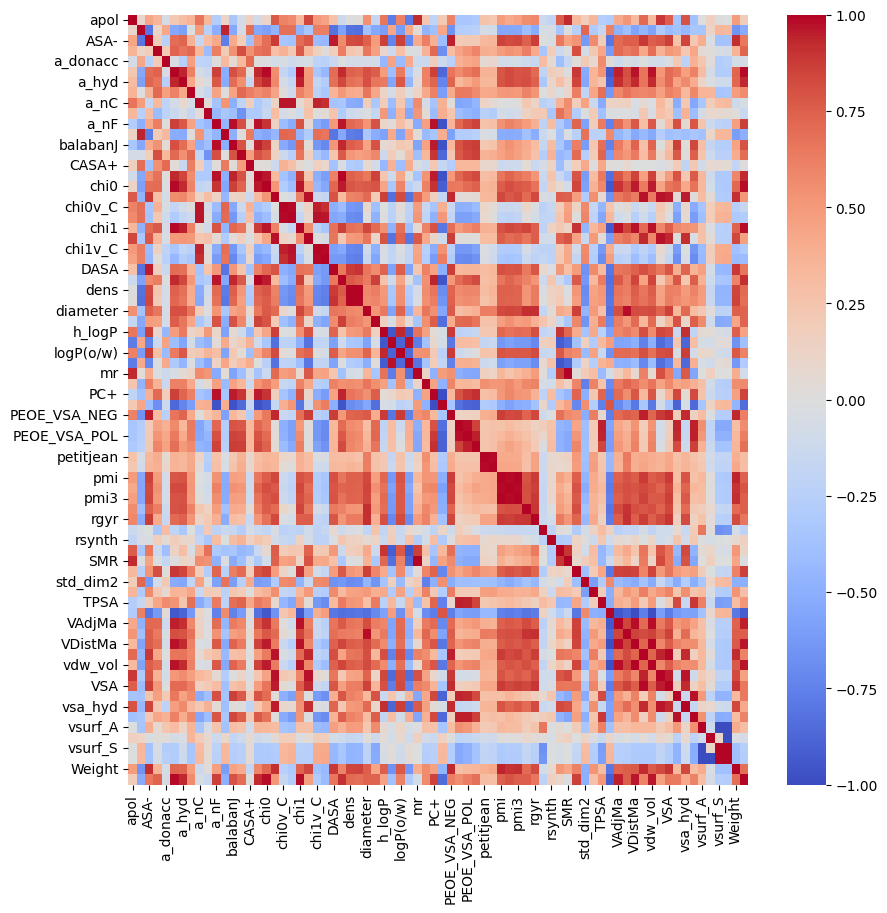

In [15]:
# Calcul de la matrice de corrélation
corr_matrix = numerical_vars.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.show()


** Justification du choix de RandomForest avec le critère Gini**

Nous avons choisi d'utiliser un modèle RandomForest avec le critère Gini pour la sélection des attributs. RandomForest est un algorithme d'apprentissage automatique basé sur les arbres de décision. Il crée un ensemble de plusieurs arbres de décision et fait la moyenne de leurs prédictions. 

Le critère Gini est une mesure de l'impureté d'un nœud dans un arbre de décision. Un indice de Gini de 0 indique que toutes les observations dans un nœud appartiennent à une seule classe, tandis qu'un indice de Gini de 0.5 indique que les observations sont réparties également entre deux classes. L'indice de Gini est calculé comme suit :

$$ Gini(p) = 1 - \sum_{i=1}^{J} p_i^2 $$

où $p_i$ est la probabilité de la classe $i$ dans le nœud et $J$ est le nombre total de classes.

Dans le contexte de la sélection des attributs, l'importance d'un attribut est généralement déterminée par la quantité d'impureté (mesurée par l'indice de Gini) qui est réduite par les divisions de l'arbre basées sur cet attribut. Plus une caractéristique réduit l'impureté, plus elle est considérée comme importante.

En utilisant RandomForest avec le critère Gini, nous pouvons sélectionner les 10 attributs qui sont les plus importants pour la prédiction de la variable cible, tout en tenant compte des interactions potentielles entre les attributs.


In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Entraînement du classifieur
rfc.fit(data_X, data_Y.values.ravel())

# Importance des caractéristiques
feature_importances = rfc.feature_importances_

# Tri par importance
feature_importances_df = pd.DataFrame({'feature': data_X.columns, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Sélectionner les 10 caractéristiques les plus importantes
best_attributes = feature_importances_df['feature'].head(10)

print("Les 10 meilleurs attributs sont :")
print(feature_importances_df.head(10))


Les 10 meilleurs attributs sont :
    feature  importance
37      PC-    0.035341
68  vsurf_A    0.033815
49     RPC-    0.033308
14    CASA+    0.029560
71  vsurf_V    0.027967
30   h_logP    0.025098
51    SlogP    0.024210
15    CASA-    0.024041
36      PC+    0.023820
31   h_logS    0.023405


In [17]:
# DataFrame avec seulement les 10 meilleurs attributs
data_best_X = data_X[best_attributes]

#### Visualisation de la distributions des 10 meilleurs attributs.

Nous allons utiliser ici des histogrammes et des boîtes à moustaches.

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Subplots
fig = make_subplots(rows=5, cols=2)

for i, attribute in enumerate(best_attributes):
    fig.add_trace(go.Histogram(x=data_best_X[attribute], nbinsx=30, name=attribute), row=i//2+1, col=i%2+1)

fig.update_layout(height=1200, width=800, title_text="Distribution des 10 meilleurs attributs")

fig.show()


In [19]:
# Subplots
fig = make_subplots(rows=3, cols=4)

for i, attribute in enumerate(best_attributes):
    fig.add_trace(go.Box(y=data_best_X[attribute], name=attribute), row=i//4+1, col=i%4+1)

fig.update_layout(height=800, width=1200, title_text="Boîtes à moustaches des 10 meilleurs attributs")

fig.show()



#### (b) Analyse de la corrélation entre les 10 meilleurs attributs

Pour évaluer quantitativement les relations de corrélation entre les 10 meilleurs attributs, nous pouvons calculer la matrice de corrélation. Celle-ci va permettre de mesurer la relation linéaire entre deux variables. Elle varie de -1 à 1, où 1 indique une corrélation positive parfaite, -1 une corrélation négative parfaite, et 0 aucune corrélation.

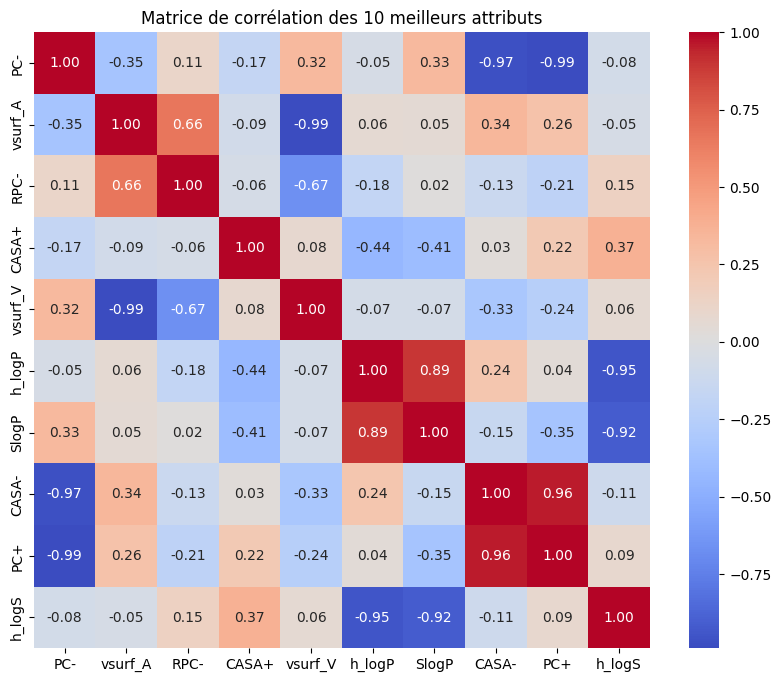

In [20]:
# Matrice de corrélation
corr_matrix = data_best_X.corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Matrice de corrélation des 10 meilleurs attributs")
plt.show()


En examinant la matrice de corrélation, nous pouvons observer plusieurs corrélations fortes entre les attributs : cela indique donc un problème de **multicolinéarité**.

Il est donc nécessaire d'utiliser l’Analyse en Composantes Principales (ACP) car elle permettra de transformer les 10 attributs sélectionnés (dont certains sont fortement corrélés entre eux) en un nouvel ensemble d’attributs non corrélés.

**Corrélation entre les variables pour chaque classe** :

Pour vérifier si les relations de corrélation entre les variables sont similaires pour toutes les 5 classes, nous pouvons calculer et visualiser la matrice de corrélation séparément pour chaque classe.

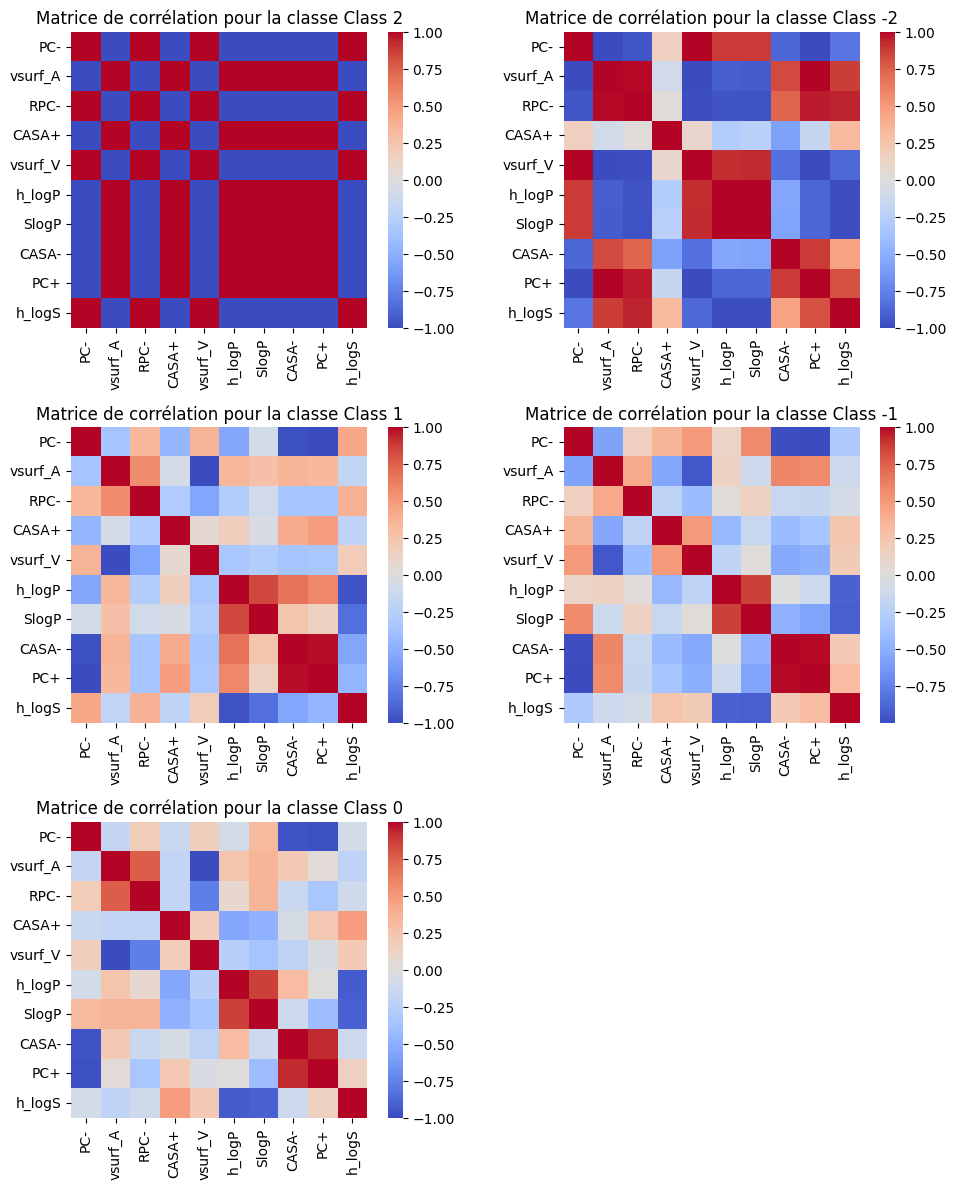

In [22]:
num_classes = data_Y.nunique().iloc[0]
num_rows = np.ceil(num_classes / 2).astype(int)

# Subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(10, 4*num_rows))

axs = axs.flatten()
y = data_Y.iloc[:, 0]
for i, classe in enumerate(y.unique()):

    data_classe = data_best_X[y == classe]
    
    corr_matrix_classe = data_classe.corr()
    
    sns.heatmap(corr_matrix_classe, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True, ax=axs[i])
    axs[i].set_title(f"Matrice de corrélation pour la classe {classe}")

if num_classes % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


Un simple obervation visuelle des matrice de corrélation poour chaque classe permet de remarquer que les relations de corrélations sont simmilaire pour les classes -1, 0, et 1 mais significativement différentes pour les classes -2 et surtout 2.
Confirmons cette observation avec la distance de Frobenius qui nous permettra ici de quantifier la similarité entre les matrices de corrélation de différentes classes en utilisant des mesures de similarité pour les matrices. 
La distance de Frobenius pour deux matrices A et B est définie comme suit : 

La distance de Frobenius entre deux matrices A et B est définie comme suit :

$$ \|A - B\|_F = \sqrt{\sum_{i,j} (a_{ij} - b_{ij})^2} $$

où $a_{ij}$ et $b_{ij}$ sont les éléments des matrices A et B respectivement.

In [23]:
corr_matrices = {classe: data_best_X[y == classe].corr() for classe in y.unique()}

for i, classe_i in enumerate(y.unique()):
    for j, classe_j in enumerate(y.unique()):
        if i < j: 
            frobenius_distance = np.linalg.norm(
                corr_matrices[classe_i] - corr_matrices[classe_j])
            print(f"La distance de Frobenius entre les classes {classe_i} et {classe_j} est {frobenius_distance:.2f}")


La distance de Frobenius entre les classes Class 2 et Class -2 est 12.78
La distance de Frobenius entre les classes Class 2 et Class 1 est 6.82
La distance de Frobenius entre les classes Class 2 et Class -1 est 9.74
La distance de Frobenius entre les classes Class 2 et Class 0 est 9.30
La distance de Frobenius entre les classes Class -2 et Class 1 est 7.99
La distance de Frobenius entre les classes Class -2 et Class -1 est 5.84
La distance de Frobenius entre les classes Class -2 et Class 0 est 7.13
La distance de Frobenius entre les classes Class 1 et Class -1 est 4.15
La distance de Frobenius entre les classes Class 1 et Class 0 est 3.08
La distance de Frobenius entre les classes Class -1 et Class 0 est 2.61


Les classes ``Class 2`` et ``Class -2`` ont la plus grande distance de Frobenius, ce qui signifie que leurs matrices de corrélation sont les plus différentes parmi toutes les paires de classes. Cela indique que entres les variables dans ces deux classes, les relations de corrélation sont très différentes les unes avec les autres.

À l’inverse, les classes ``Class -1`` et ``Class 0`` ont la plus petite distance de Frobenius, ce qui signifie que les variables dans ces deux classes ont des relations très similaires. 

Les autres paires de classes ont des distances de Frobenius intermédiaires, ce qui signifie que leurs matrices de corrélation sont plus ou moins similaires.

Ces résultats permettent de voir que les classes avec des numéros plus proches (numériquement) ont des matrices de corrélation plus similaires, ce qui suggère que les variables au sein de ces classes ont des relations plus similaires et vice versa.  

#### (c) Transformation par ACP

Nous voulons utiliser l'Analyse des Composantes Principales (ACP) pour réduire la dimensionnalité de nos données et visualiser la séparation entre les 5 classes. Nous allons donc déterminer le nombre optimal de composantes principales à utiliser pour la classification : 2 ou 3. 

Commençons par effectuer une ACP avec 2 et 3 composantes principales et visualiser la séparation entre les classes.

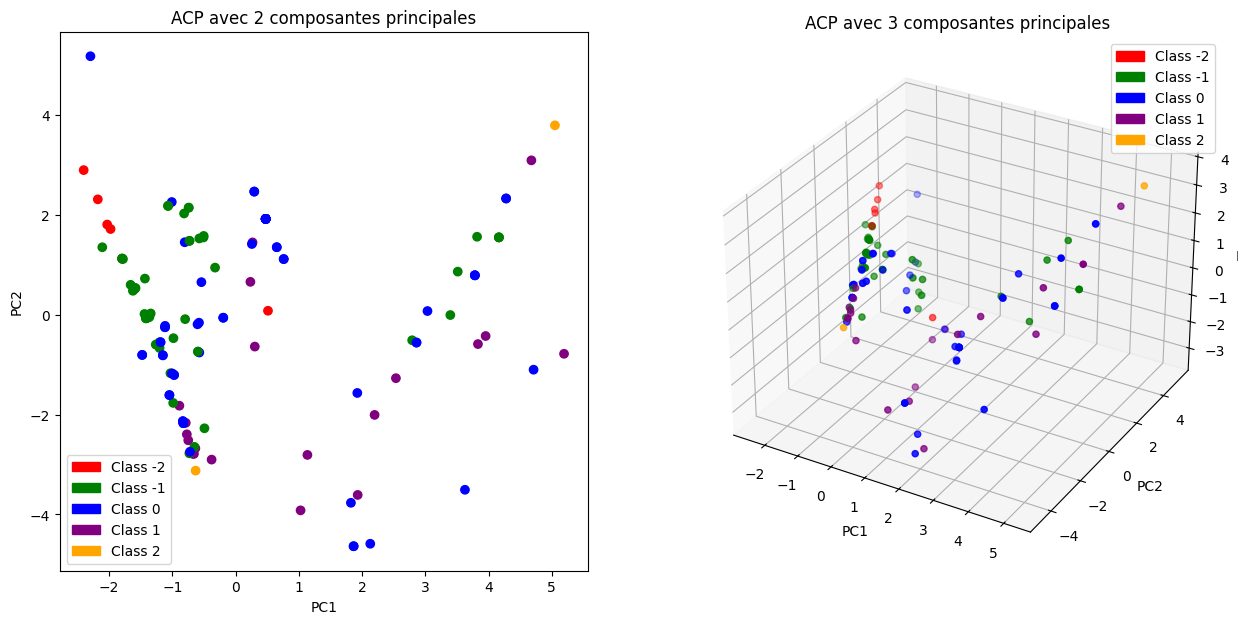

In [24]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

# Mappage des classes (conversion des étiquettes de classe en entiers)
class_mapping = {"Class -2": 0, "Class -1": 1, "Class 0": 2, "Class 1": 3, "Class 2": 4}
Y_int = y.map(class_mapping)

# ACP avec 2 composantes principales
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(data_best_X)

# ACP avec 3 composantes principales
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(data_best_X)

# Définir les couleurs pour chaque classe
colors = ['red', 'green', 'blue', 'purple', 'orange']
color_map = {class_mapping[classe]: color for classe, color in zip(class_mapping, colors)}

# Visualisation
fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(1, 2, 1)
scatter = ax1.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=Y_int.map(color_map))
ax1.set_title('ACP avec 2 composantes principales')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

# Création des légendes pour le graphique 2D
patches = [mpatches.Patch(color=color, label=label) for label, color in zip(class_mapping.keys(), colors)]
ax1.legend(handles=patches)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=Y_int.map(color_map))
ax2.set_title('ACP avec 3 composantes principales')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

# Création des légendes pour le graphique 3D
ax2.legend(handles=patches)

plt.show()


En visualisant les résultats, il semble que l’ACP avec **3 composantes principales** offre une meilleure séparation des classes que celle avec 2 composantes.

Pour confirmer cette obervation, nous allons calculer, pour chaque objet, le centroïde dont il est le plus proche par la distance Euclidienne dans les cas 2CP et 3CP. Nous comparerons ensuite ces résultats avec les classes réelles des objets.

In [25]:
from sklearn.metrics import classification_report

# ACP avec 2 composantes

# Calcul des centroides pour chaque classe
centroids = np.array([np.mean(X_pca_2[Y_int == i], axis=0) for i in range(5)])

# Calcul des distances euclidiennes entre chaque objet et les centroides
distances = np.array([np.linalg.norm(X_pca_2 - centroid, axis=1) for centroid in centroids])

# Attribution à chaque objet de la classe du centroïde le plus proche
preds_pca2 = np.argmin(distances, axis=0)

# Affichage des résultats avec classification_report
report_pca2 = classification_report(Y_int, preds_pca2, target_names=class_mapping.keys())
print("Métriques pour ACP avec 2 composantes principales :\n\n", report_pca2)


Métriques pour ACP avec 2 composantes principales :

               precision    recall  f1-score   support

    Class -2       0.21      0.83      0.33         6
    Class -1       0.63      0.61      0.62        64
     Class 0       0.83      0.24      0.38        62
     Class 1       0.45      0.65      0.53        20
     Class 2       0.05      0.50      0.09         2

    accuracy                           0.47       154
   macro avg       0.43      0.57      0.39       154
weighted avg       0.66      0.47      0.49       154



In [26]:
# ACP avec 3 composantes

centroids_3 = np.array([np.mean(X_pca_3[Y_int == i], axis=0) for i in range(5)])
distances_3 = np.array([np.linalg.norm(X_pca_3 - centroid, axis=1) for centroid in centroids_3])
preds_pca3 = np.argmin(distances_3, axis=0)
report_pca3 = classification_report(Y_int, preds_pca3, target_names=class_mapping.keys())
print("Métriques pour ACP ave 3 composantes principales :\n\n", report_pca3)


Métriques pour ACP ave 3 composantes principales :

               precision    recall  f1-score   support

    Class -2       0.29      0.83      0.43         6
    Class -1       0.66      0.62      0.64        64
     Class 0       0.71      0.32      0.44        62
     Class 1       0.44      0.60      0.51        20
     Class 2       0.05      0.50      0.09         2

    accuracy                           0.51       154
   macro avg       0.43      0.58      0.42       154
weighted avg       0.63      0.51      0.53       154



Même si les résultats ne sont pas du tout "bon", on remarque pour toutes les métriques, l'ACP avec **3 composantes principales** offre une meilleure séparation des classes que celle avec 2 composantes.

### 2. Mesure de distance

#### (a) Choix de la mesure de distance

Notre analyse de corrélation nous a révélé qu'il y a de la multicolinéarité entre les variables. Ainsi, parmi les 3 distances (Manhattan, Euclidienne, ou Mahalanobis), nous pouvons choisir la distance de Mahalanobis. Celle-ci tient compte de la covariance entre les variables, ce qui peut être important lorsque les variables ne sont pas indépendantes. Elle prend donc en compte les relations de corrélation et de covariance entre les variables, ce qui est pertinent ici. 

Pour vérifier cette réponse, nous allons calculer les centroïdes les plus proches pour chaque objet en utilisant les trois mesures de distance (Manhattan, Euclidienne et Mahalanobis), puis en comparant les résultats avec les classes réelles des objets. Nous allons utiliser les données en dimmensions réduites 
par l'ACP à 3 composantes principales (celle-ci donnant les meilleurs résultats pour la question 1.(c)). 

In [27]:
# Distances de Manhattan
distances_manhattan = np.array([np.sum(np.abs(X_pca_3 - centroid), axis=1) for centroid in centroids_3])

# Distances Euclidienne
distances_euclidean = np.array([np.linalg.norm(X_pca_3 - centroid, axis=1) for centroid in centroids_3])

# Distances de Mahalanobis
epsilon = 1e-6  # Petite valeur de régularisation
inverse_covariance_matrices = [np.linalg.inv(np.cov(X_pca_3[Y_int == i].T) + epsilon * np.eye(X_pca_3.shape[1])) for i in range(5)] # par classe
distances_mahalanobis = np.array([np.sqrt(np.sum((X_pca_3 - centroid) @ inv_covariance_matrix * (X_pca_3 - centroid), axis=1)) for centroid, inv_covariance_matrix in zip(centroids_3, inverse_covariance_matrices)])

distances_mahalanobis = np.nan_to_num(distances_mahalanobis) # Remplacer les NaN par 0

# Prédictions basées sur le centroïde le plus proche
preds_manhattan = np.argmin(distances_manhattan, axis=0)
preds_euclidean = np.argmin(distances_euclidean, axis=0)
preds_mahalanobis = np.argmin(distances_mahalanobis, axis=0)

# Résultats pour chaque type de distance
print("Métriques avec Distance Manhattan :\n\n", classification_report(Y_int, preds_manhattan, target_names=class_mapping.keys(), zero_division='warn'))
print("Métriques avec Distance Euclidienne :\n\n", classification_report(Y_int, preds_euclidean, target_names=class_mapping.keys(), zero_division='warn'))
print("Métriques avec Distance Mahalanobis :\n\n", classification_report(Y_int, preds_mahalanobis, target_names=class_mapping.keys(), zero_division='warn'))


Métriques avec Distance Manhattan :

               precision    recall  f1-score   support

    Class -2       0.19      0.83      0.30         6
    Class -1       0.53      0.50      0.52        64
     Class 0       0.74      0.32      0.45        62
     Class 1       0.50      0.50      0.50        20
     Class 2       0.05      0.50      0.09         2

    accuracy                           0.44       154
   macro avg       0.40      0.53      0.37       154
weighted avg       0.59      0.44      0.47       154

Métriques avec Distance Euclidienne :

               precision    recall  f1-score   support

    Class -2       0.29      0.83      0.43         6
    Class -1       0.66      0.62      0.64        64
     Class 0       0.71      0.32      0.44        62
     Class 1       0.44      0.60      0.51        20
     Class 2       0.05      0.50      0.09         2

    accuracy                           0.51       154
   macro avg       0.43      0.58      0.42       154

Les résultats suggèrent que la distance de Mahalanobis offre de meilleures performances pour la classification des classes. La métriques (précision, rappel et F1-score) sont les plus élevées pour toutes les classes, ce qui confirme notre choix de départ que la distance de Mahalanobis est le meilleur choix parmi les trois options de distance évaluées.

#### (b) Choix du type de matrice de covariance pour la distances de Mahalanobis

Compte tenu de notre constatation antérieure que les relations de corrélation entre les variables ne sont pas similaires pour toutes les 5 classes, il serait donc plus logique d'utiliser une matrice de covariance par classe pour la distance de Mahalanobis. 

Vérifions celà en comparant les métriques pour la matrice de covariance par classe et la matrice de covariance pour toutes les données.

In [28]:
# Matrice de covariance pour toutes les données
covariance_matrix_all_data = np.cov(X_pca_3.T) + epsilon * np.eye(X_pca_3.shape[1])

centroids_3_broadcasted = centroids_3[:, np.newaxis, :]  # Pour permettre la soustraction

# Distances avec la matrice de covariance pour toutes les données
distances_all_data = np.sqrt(np.sum((X_pca_3 - centroids_3_broadcasted) @ np.linalg.inv(covariance_matrix_all_data) * (X_pca_3 - centroids_3_broadcasted), axis=2))
distances_all_data = np.nan_to_num(distances_all_data)  # Remplacer les NaN par 0

# Prédictions
preds_all_data = np.argmin(distances_all_data, axis=0)

# Affichage des résultats avec classification_report pour chaque approche
print("Distance Mahalanobis avec Matrice de covariance par classe :\n\n", classification_report(Y_int, preds_mahalanobis, target_names=class_mapping.keys()))
print("Distance Mahalanobis avec Matrice de Covariance pour toutes les données :\n\n", classification_report(Y_int, preds_all_data, target_names=class_mapping.keys()))


Distance Mahalanobis avec Matrice de covariance par classe :

               precision    recall  f1-score   support

    Class -2       1.00      0.67      0.80         6
    Class -1       0.82      0.64      0.72        64
     Class 0       0.65      0.55      0.60        62
     Class 1       0.35      0.80      0.48        20
     Class 2       1.00      1.00      1.00         2

    accuracy                           0.63       154
   macro avg       0.76      0.73      0.72       154
weighted avg       0.70      0.63      0.65       154

Distance Mahalanobis avec Matrice de Covariance pour toutes les données :

               precision    recall  f1-score   support

    Class -2       0.29      0.83      0.43         6
    Class -1       0.68      0.62      0.65        64
     Class 0       0.72      0.34      0.46        62
     Class 1       0.46      0.65      0.54        20
     Class 2       0.05      0.50      0.09         2

    accuracy                           0.52   

La distance Mahalanobis avec une matrice de covariance par classe offre des performances globalement meilleures, avec une précision, un rappel et un score F1 plus élevés pour la plupart des classes, ce qui confirme notre réponse plus haut.

Cependant ...

### 3. Choix du modèle de classification

#### (a) K=5 Plus Proches Voisins vs Plus Proche Centroide

Pour évaluer la performance des méthodes des k plus proches voisins (k=5) et du plus proche centroïde, nous allons utiliser la représentation optimale des données obtenue par l'ACP avec 3 composantes principales avec la distance de Mahalanobis utilisant une matrice de covariance par classe. Nous allons ainsi comparer les modèles entraîné.

Notons ici que la distance de Mahalanobis dans ``KNeighborsClassifier()`` ne peut pas être différente pour chaque classe, elle doit être la même pour tous les points. Il en est de même pour ``NearestCentroid()``. Par conséquent, on va utiliser une matrice de covariance pour toutes les données.

In [29]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

# Ensembles d'entraînement et de test (X_pca_3 et Y_int)

# Calcul de la matrice de covariance à partir de toutes les données
covariance_matrix = np.cov(X_pca_3.T) + epsilon * np.eye(X_pca_3.shape[1])

# Inversion de la matrice de covariance pour la distance de Mahalanobis
VI = np.linalg.inv(covariance_matrix)

# Modèle k=5 plus proches voisins avec matrice de covariance
knn_model = KNeighborsClassifier(n_neighbors=5, metric='mahalanobis', metric_params={'VI': VI})
knn_model.fit(X_pca_3, Y_int)
preds_knn = knn_model.predict(X_pca_3)
report_knn = classification_report(Y_int, preds_knn, target_names=class_mapping.keys(), zero_division=0)

# Affichage des résultats
print("Classification pour la méthode des k=5 plus proches voisins :\n", report_knn)


Classification pour la méthode des k=5 plus proches voisins :
               precision    recall  f1-score   support

    Class -2       0.75      0.50      0.60         6
    Class -1       0.88      0.83      0.85        64
     Class 0       0.71      0.87      0.78        62
     Class 1       0.50      0.35      0.41        20
     Class 2       0.00      0.00      0.00         2

    accuracy                           0.76       154
   macro avg       0.57      0.51      0.53       154
weighted avg       0.75      0.76      0.75       154



In [30]:


# Calcul de la matrice de covariance à partir de toutes les données
covariance_matrix = np.cov(X_pca_3.T) + epsilon * np.eye(X_pca_3.shape[1])

# Inversion de la matrice de covariance pour la distance de Mahalanobis
VI = np.linalg.inv(covariance_matrix)

# Définition de la fonction de distance de Mahalanobis
def mahalanobis_distance(x, y):
    diff = x - y
    return np.sqrt(np.dot(np.dot(diff, VI), diff.T))

# Modèle du plus proche centroïde avec distance de Mahalanobis
centroid_model = NearestCentroid(metric=mahalanobis_distance)
centroid_model.fit(X_pca_3, Y_int)

preds_centroid = centroid_model.predict(X_pca_3)
report_centroid = classification_report(Y_int, preds_centroid, target_names=class_mapping.keys())

print("\n\nClassification pour la méthode du plus proche centroïde :\n", report_centroid)





Classification pour la méthode du plus proche centroïde :
               precision    recall  f1-score   support

    Class -2       0.29      0.83      0.43         6
    Class -1       0.68      0.62      0.65        64
     Class 0       0.72      0.34      0.46        62
     Class 1       0.46      0.65      0.54        20
     Class 2       0.05      0.50      0.09         2

    accuracy                           0.52       154
   macro avg       0.44      0.59      0.44       154
weighted avg       0.65      0.52      0.54       154



C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning:

Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.



In [31]:
from scipy.spatial.distance import mahalanobis
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y

class MahalanobisCentroidClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, VI=None):
        self.VI = VI

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = np.unique(y)
        self.centroids_ = np.array([np.mean(X[y == label], axis=0) for label in self.classes_])
        return self

    def predict(self, X):
        distances = np.array([[mahalanobis(x, centroid, self.VI) for centroid in self.centroids_] for x in X])
        return np.argmin(distances, axis=1)


mahalanobis_centroid_model = MahalanobisCentroidClassifier(VI=VI)
mahalanobis_centroid_model.fit(X_pca_3, Y_int)
preds_centroid = mahalanobis_centroid_model.predict(X_pca_3)
report_centroid = classification_report(Y_int, preds_centroid, target_names=class_mapping.keys())
print("\n\nClassification pour la méthode du plus proche centroïde :\n", report_centroid)




Classification pour la méthode du plus proche centroïde :
               precision    recall  f1-score   support

    Class -2       0.29      0.83      0.43         6
    Class -1       0.68      0.62      0.65        64
     Class 0       0.72      0.34      0.46        62
     Class 1       0.46      0.65      0.54        20
     Class 2       0.05      0.50      0.09         2

    accuracy                           0.52       154
   macro avg       0.44      0.59      0.44       154
weighted avg       0.65      0.52      0.54       154



#### (b) Modèles de Mélange Gaussien

Pour évaluer la vraisemblance de l'hypothèse que nos données correspondent à des mélanges de distributions gaussiennes, nous avons utilisé le modèle de mélange gaussien et aussi, explorer différentes options pour la covariance des différentes classes, à savoir ``spherical``, ``diag``, ``tied``, et ``full``.

Comme dans le code fourni, la performance de chaque modèle sur les ensembles d'entraînement et de test est évaluée en utilisant la justesse comme métrique d'évaluation.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


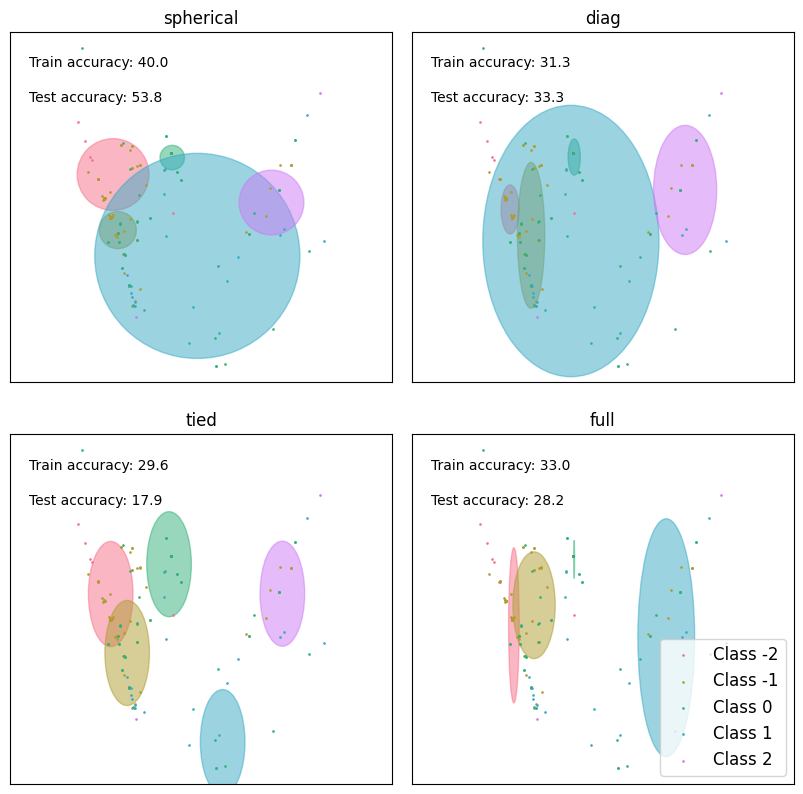

In [32]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# Modified by Aida Ouangraoua <aida.ouangraoua@usherbrooke.com>
# Modified by Nadia Tahiri <Nadia.Tahiri@USherbrooke.com>
# Initial code at https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca_3, Y_int, test_size=0.25, random_state=0)

colors = sns.color_palette("husl", 5)

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1], color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

n_classes = 5

# Essayer les GMM avec différents types de covariances
estimators = {
    cov_type: GaussianMixture(n_components=n_classes, covariance_type=cov_type, max_iter=100, random_state=0)
    for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(4 * n_estimators // 2, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05, left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    # Initialiser les moyennes des GMM de manière supervisée
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(n_classes)])

    # Entraîner les autres paramètres en utilisant l'algorithme EM
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for class_label, color in zip(class_mapping.keys(), colors):
        data = X_pca_3[Y_int == class_mapping[class_label]]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color, label=class_label)

    # Afficher les résultats pour l'ensemble d'entraînement
    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred == y_train)
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % (train_accuracy * 100), transform=h.transAxes)

    # Afficher les résultats pour l'ensemble de test avec des croix
    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred == y_test)
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % (test_accuracy * 100), transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
plt.show()


Nous avons observé que le modèle avec une covariance ``tied`` a produit les meilleurs résultats tant sur l'ensemble d'entraînement que sur l'ensemble de test. Cela suggère que l'hypothèse de mélanges de distributions gaussiennes avec une covariance partagée entre les classes est plausible pour nos données.

Cepandant, dans le cadre de cette analyse, il est important de rappeller que le jeu de données présente une distribution très déséquilibrée entre les différentes classes. Ce déséquilibre peut avoir un impact significatif sur les performances du modèle, en particulier lorsqu'il est confronté à des classes sous-représentées. Ce qui peut expliquer des performances si faible (moins de 50 % pour la justesse) du modèle. 

### 4. Application

Pour déterminer la classe de la nouvelle observation à l'aide du modèle retenu au Point 3, nous utilisons le modèle de mélange gaussien (Gaussian Mixture Model) avec une covariance ``tied`` qui a présenté les meilleurs résultats en termes d'accuracy sur l'ensemble de test. 

Nous allons d'abord prétraiter la nouvelle observation de la même manière que les données d'entraînement afin de garantir la cohérence des résultats.

In [33]:
# Nouvelles observations depuis test_TP1.xlsx
new_data = pd.read_excel('test_TP1.xlsx')

# Suppression des colonnes "SMILES" et "Class"
new_data = new_data.drop(['SMILES', 'Class'], axis=1)

# Normalisation des données avec l'objet scaler
new_data_scaled = pd.DataFrame(scaler.transform(new_data), columns=new_data.columns)

# Sélection les 10 meilleurs attributs avec best_attributes
new_data_selected = new_data_scaled[best_attributes]

# ACP avec l'objet pca_3
new_data_pca = pca_3.transform(new_data_selected)

new_data_pca

array([[-1.39993077,  0.05869294,  0.28909454],
       [ 0.35434749,  2.5694883 , -2.86018355]])

Maintenant, nous pouvons faire la prédiction pour les nouvelles données.

In [34]:
# Modèle retenu avec covariance "tied"
selected_model = estimators['tied']

# Prédiction
predicted_class = selected_model.predict(new_data_pca)

test_classes = [key for key, value in class_mapping.items() if value in predicted_class]

print("Les classes prédites pour les nouvelles observations sont :", test_classes)


Les classes prédites pour les nouvelles observations sont : ['Class -2', 'Class 0']


## Conclusion